# Perceptron

[Source](https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/)

[Source2](https://brilliant.org/wiki/perceptron/)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt 

# Modelo

Idea general del perceptrón:
* Es un algoritmo de aprendizaje supervisado para clasificación.
* Es la suma de las entradas x<sub>i</sub> ponderadas por pesos w<sub>i</sub>.
* Se ocupa una función de activación a la salida de la neurona, en este caso el escalón.

El entrenamiento consiste en:
* A partir de los datos de entrada, el objetivo es calcular los pesos.

Una vez entrenado:
* Clasifica datos nuevos.

![](images/perceptron.png)

Vamos a necesitar:
- Función que deseamos entrenar
- Valores de entrenamiento
- Pesos al azar
- Función de activación
- Hyper Parámetros

## Función a entrenar: OR

| A | B | A or B |
|---|---|--------|
| 0 | 0 | 0      |
| 0 | 1 | 1      |
| 1 | 0 | 1      |
| 1 | 1 | 1      |

## Valores de entrenamiento

In [2]:
trainingData = [
    #([valores de entrada], salida esperada)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

## Pesos iniciales
Un aspecto de considerar de nuestro problema es que tendremos 3 pesos:
* 2 entradas: $w_1$ de $A$ y $w_2$ de $B$ (`A` y `B` en la tabla) 
* 1 de bías: $w_0$

In [3]:
weights = np.random.rand(2)
bias = random.random()
print("Weights:", weights)
print("Bias:", bias)

Weights: [ 0.9791545   0.35063184]
Bias: 0.7711181336406407


## Funcion de activación

In [4]:
def step(x):
    if x<0:
        return 0
    return 1

In [5]:
print(step(-1))
print(step(-0.1))
print(step(0))
print(step(0.1))
print(step(1))

0
0
1
1
1


## Hyper Parámetros

In [6]:
learningRate = 0.2

# Entrenamiento
El entrenamiento está dado en 4 pasos:
1. Empezar con valores al azar a los pesos $w(0)$ ($w_1$, $w_2$) y al bias $w_0$.
2. Para cada entrada $x_i$, encontrar un arreglo de pesos $w$, tal que $w(t) \cdot x_i + w_0 > 0$. Con $y_i$ la salida para la entrada $x_i$.
3. Actualizar los pesos para la siguiente iteración:
    - $w(t+1) = w(t) + \alpha(d_i - y_i)x_i$
    - $w_0(t+1) = w_0(t) + \alpha(d_i - y_i)$
4. Si el entrenamiento es offline (se entrenan con las mismas entradas), se repiten los pasos 2 y 3 hasta que se reduce el error lo suficiente.

Desde los datos de entrenamiento tenemos:
* $x_i$
* $d_i$

Para cada input, debemos calcular: 
* $y_i$

Con los $y_i$, calculamos los nuevos pesos $w_i$.

## Ejemplo manual

In [47]:
trainingData = [
    #([valores de entrada], salida esperada)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

learningRate = 0.5

w = np.array([0, 0])
b = 0
print("weights:", w)
print("bias:", b)

weights: [0 0]
bias: 0


### Epoch 1; Iteración 1
Valor entrenamiento $x_0$

In [8]:
i = 0
xi, di = trainingData[i]
print("xi:", xi, "di", di)

xi: [0, 0] di 0


In [9]:
yi = xi[0] * w[0] + xi[1] * w[1] + b
print("yi:", yi)

yi: 0


In [10]:
error = di - step(yi)
print("di-step(yi):", error)

di-step(yi): -1


In [11]:
w = w + learningRate * error * np.array(xi)
print("new weigth:", w)

new weigth: [ 0.  0.]


In [12]:
b = b + learningRate * error
print("new bias:", b)

new bias: -0.5


### Epoch 1; Iteración 2
Valor entrenamiento $x_1$

In [13]:
i = 1
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0] * w[0] + xi[1] * w[1] + b
print("yi:", yi)
error = di - step(yi)
print("di-step(yi):", error)
w = w + learningRate * error * np.array(xi)
print("new weigth:", w)
b = b + learningRate * error
print("new bias:", b)

xi: [0, 1] di 1
yi: -0.5
di-step(yi): 1
new weigth: [ 0.   0.5]
new bias: 0.0


### Epoch 1; Iteración 3
Valor entrenamiento $x_2$

In [14]:
i = 2
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0] * w[0] + xi[1] * w[1] + b
print("yi:", yi)
error = di - step(yi)
print("di-step(yi):", error)
w = w + learningRate * error * np.array(xi)
print("new weigth:", w)
b = b + learningRate * error
print("new bias:", b)

xi: [1, 0] di 1
yi: 0.0
di-step(yi): 0
new weigth: [ 0.   0.5]
new bias: 0.0


### Epoch 1; Iteración 4
Valor entrenamiento $x_3$

In [15]:
i = 3
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0] * w[0] + xi[1] * w[1] + b
print("yi:", yi)
error = di - step(yi)
print("di-step(yi):", error)
w = w + learningRate * error * np.array(xi)
print("new weigth:", w)
b = b + learningRate * error
print("new bias:", b)

xi: [1, 1] di 1
yi: 0.5
di-step(yi): 0
new weigth: [ 0.   0.5]
new bias: 0.0


### Epoch 2;
Todos los valores de entrenamiento de nuevo.

In [16]:
for i in range(len(trainingData)):
    xi, di = trainingData[i]
    yi = xi[0] * w[0] + xi[1] * w[1] + b
    error = di - step(yi)
    w = w + learningRate * error * np.array(xi)
    b = b + learningRate * error

    print("xi:", xi, "di", di)
    print("yi:", yi)
    print("di-step(yi):", error)
    print("new weigth:", w)
    print("new bias:", b)
    print()

xi: [0, 0] di 0
yi: 0.0
di-step(yi): -1
new weigth: [ 0.   0.5]
new bias: -0.5

xi: [0, 1] di 1
yi: 0.0
di-step(yi): 0
new weigth: [ 0.   0.5]
new bias: -0.5

xi: [1, 0] di 1
yi: -0.5
di-step(yi): 1
new weigth: [ 0.5  0.5]
new bias: 0.0

xi: [1, 1] di 1
yi: 1.0
di-step(yi): 0
new weigth: [ 0.5  0.5]
new bias: 0.0



### Epoch 3;
Todos los valores de entrenamiento de nuevo. Esta vez, con print solo por la Epoch completa.

In [17]:
for i in range(len(trainingData)):
    xi, di = trainingData[i]
    yi = xi[0] * w[0] + xi[1] * w[1] + b
    error = di - step(yi)
    w = w + learningRate * error * np.array(xi)
    b = b + learningRate * error

    print("xi:", xi, "di", di)
    print("yi:", yi)
    print("di-step(yi):", error)
    print("new weigth:", w)
    print("new bias:", b)
    print()

xi: [0, 0] di 0
yi: 0.0
di-step(yi): -1
new weigth: [ 0.5  0.5]
new bias: -0.5

xi: [0, 1] di 1
yi: 0.0
di-step(yi): 0
new weigth: [ 0.5  0.5]
new bias: -0.5

xi: [1, 0] di 1
yi: 0.0
di-step(yi): 0
new weigth: [ 0.5  0.5]
new bias: -0.5

xi: [1, 1] di 1
yi: 0.5
di-step(yi): 0
new weigth: [ 0.5  0.5]
new bias: -0.5



## Cuando detenerse?
Después de varias iteraciones, los pesos convergen a un valor del cual después no se modifican. En este caso, iteraremos hasta que no haya cambio entre estos valores.

In [18]:
while True:
    old_w = w
    old_b = b
    
    for i in range(len(trainingData)):
        xi, di = trainingData[i]
        yi = xi[0] * w[0] + xi[1] * w[1] + b
        error = di - step(yi)
        w = w + learningRate * error * np.array(xi)
        b = b + learningRate * error

    print("x:", xi, "w", w, b)
    
    if((old_w == w).all() and old_b == b):
        print("Success!")
        break;

x: [1, 1] w [ 0.5  0.5] -0.5
Success!


## Random inputs

Para los 3 primeros valores de entrada, en la primera iteración, no se avanzó en nada. Esto puede pasar, sobre todo con miles de valores de entrada. Para generalizar más la solución, se recomienda tomar al azar los valores desde el set de entrada en cada iteración:

`x, di = random.choice(trainingData)`

Un problema de esto, es que puede que no se tenga avance entre dos iteraciones continuas. En ese caso, una forma de solucionar esto, puede ser iterando una cantidad determinada de veces.

In [108]:
x, di = random.choice(trainingData)
print("inputs (xi):\t", x)
print("expected (di):\t", di)

inputs (xi):	 [0, 0]
expected (di):	 0


**Implemented**

Success!


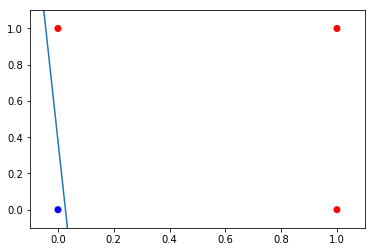

In [105]:
trainingData = [
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

learningRate = 0.2

w = np.random.rand(2)
b = random.random()

n = 100
for i in range(n):
    old_w = w
    old_b = b
    
    x, di = random.choice(trainingData)
    yi = np.dot(w, x) + b
    error = di - step(yi)
    w = w + learningRate * error * np.array(x)
    b = b + learningRate * error
    n = n - 1 
    
print("Success!")
plotPerceptron()


In [32]:
learningRate = 0.2

## inputs.csv

In [33]:
!cat inputs.csv

0,0,0
0,1,1
1,0,1
1,1,1

## read csv

In [34]:
inputs = np.genfromtxt('inputs.csv', delimiter=',')
print(inputs)

[[ 0.  0.  0.]
 [ 0.  1.  1.]
 [ 1.  0.  1.]
 [ 1.  1.  1.]]


## input values

In [35]:
input = inputs[:,0:-1]
print(input)

[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]]


## target values

In [36]:
target = inputs[:,-1:]
print(target)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]


## add bias

In [37]:
bias = np.ones((len(input),1))
print(bias)
print()
input = np.concatenate( (input, bias), axis=1 )
print(input)

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]

[[ 0.  0.  1.]
 [ 0.  1.  1.]
 [ 1.  0.  1.]
 [ 1.  1.  1.]]


## weights

In [38]:
w = np.random.rand(3)
print(w)

[ 0.13322716  0.15074299  0.18138765]


## random values from input

In [39]:
i = random.randrange(0,len(input))    
x, expected = input[i], target[i]
print(x, expected)

[ 0.  1.  1.] [ 1.]


## dot product
En vez de hacer todas las operaciones a mano para cada uno de los inputs, hacerlo directamente para todo el vector. Para esto requerimos el bias dentro del input.

In [40]:
result = np.dot(w, x)
print(result)

0.332130635593


## función de activación

In [41]:
def step(vector):
    cp = np.where(vector > 0, 1, 0)
    return cp

## error

In [42]:
error = expected - step(result)
print(error)

[ 0.]


## actualizar pesos

In [43]:
w += learningRate * error * x
print(w)

[ 0.13322716  0.15074299  0.18138765]


## Refactor

In [124]:
def perceptron(inputfile = "inputs.csv", learning_rate = 0.2, num_iters = 20):
    inputs = np.genfromtxt(inputfile, delimiter=',')
    input = inputs[:,0:-1]
    target = inputs[:,-1:]
    bias = np.ones((len(input),1))
    input = np.concatenate( (input, bias), axis=1 )
    w = np.random.rand(3)
    for i in range(num_iters):
        i = random.randrange(0,len(input))    
        x, expected = input[i], target[i]
        result = np.dot(w, x)
        error = expected - step(result)
        w += learningRate * error * x
        print(x, w, error, expected - result)
    return w

[ 0.  0.  1.] [ 0.86263468  0.78441746  0.44091914] [-1.] [-0.64091914]
[ 1.  1.  1.] [ 0.86263468  0.78441746  0.44091914] [ 0.] [-1.08797129]
[ 1.  1.  1.] [ 0.86263468  0.78441746  0.44091914] [ 0.] [-1.08797129]
[ 1.  1.  1.] [ 0.86263468  0.78441746  0.44091914] [ 0.] [-1.08797129]
[ 1.  1.  1.] [ 0.86263468  0.78441746  0.44091914] [ 0.] [-1.08797129]
[ 0.  0.  1.] [ 0.86263468  0.78441746  0.24091914] [-1.] [-0.44091914]
[ 0.  0.  1.] [ 0.86263468  0.78441746  0.04091914] [-1.] [-0.24091914]
[ 0.  0.  1.] [ 0.86263468  0.78441746 -0.15908086] [-1.] [-0.04091914]
[ 1.  0.  1.] [ 0.86263468  0.78441746 -0.15908086] [ 0.] [ 0.29644617]
[ 1.  1.  1.] [ 0.86263468  0.78441746 -0.15908086] [ 0.] [-0.48797129]
[ 0.  0.  1.] [ 0.86263468  0.78441746 -0.15908086] [ 0.] [ 0.15908086]
[ 0.  0.  1.] [ 0.86263468  0.78441746 -0.15908086] [ 0.] [ 0.15908086]
[ 0.  1.  1.] [ 0.86263468  0.78441746 -0.15908086] [ 0.] [ 0.37466339]
[ 0.  0.  1.] [ 0.86263468  0.78441746 -0.15908086] [ 0.] [ 0.15

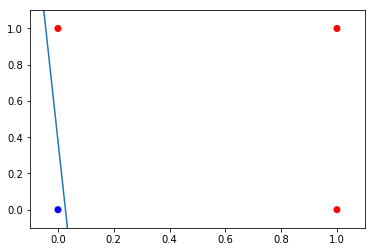

In [129]:
weights = perceptron()
plotPerceptron()